<a href="https://colab.research.google.com/github/jossy450/Sales_-_Revenue_Forecasting/blob/main/Sales_%26_Revenue_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Sales & Revenue Forecasting Project
# Author: Joseph Ojediran
# Description: A predictive data analysis project for revenue forecasting using Python.

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [8]:

# Step 2: Load Dataset
# Dataset source: Kaggle (Walmart Sales Data, Retail Sales Dataset, or create a synthetic dataset)
df = pd.read_csv('/content/sales_data.csv')  # Replace with your dataset path
df.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [14]:
# Step 3: Data Preprocessing
# Handling missing values
df.dropna(inplace=True)

# Convert date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.sort_values(by='Date', inplace=True)

# Feature Engineering: Extract Year, Month, and Day
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day




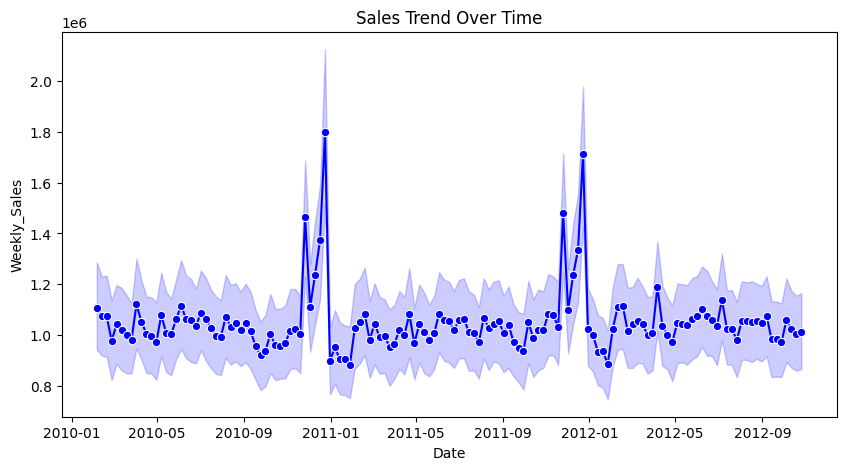

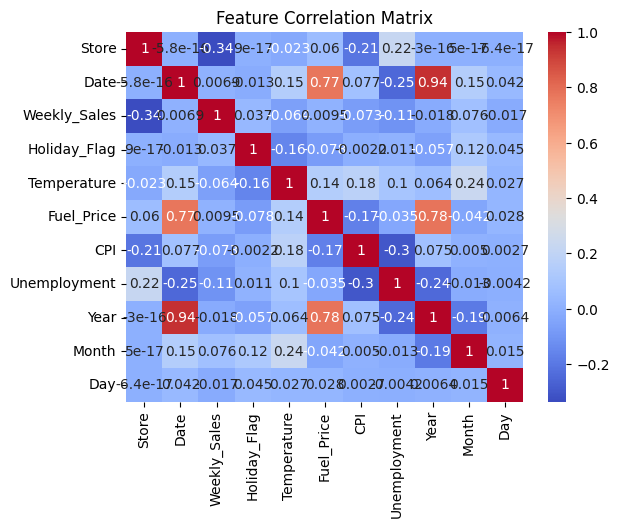

In [13]:
# Step 4: Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Date', y = 'Weekly_Sales', marker='o', color='blue')
plt.title('Sales Trend Over Time')
plt.show()

# Correlation Analysis
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()



In [17]:
# Step 5: Train Machine Learning Model
# Select Features and Target
X = df[['Day','Month','Year']]
y = df['Weekly_Sales']

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model (Choose Linear Regression or RandomForestRegressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [18]:
# Step 6: Model Evaluation
predictions = model.predict(X_test)
print(f"Mean Absolute Error: {mean_absolute_error(y_test, predictions)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, predictions)}")



Mean Absolute Error: 476245.64396789804
Mean Squared Error: 321656901248.88525


In [24]:
# Step 7: Future Sales Prediction
future_dates = pd.DataFrame({
    'Day': [1]*12,
    'Month': list(range(1, 13)),
    'Year': [2025]*12  # Reorder the columns
})
future_sales = model.predict(future_dates)

# Create a DataFrame for the predictions
predictions_df = pd.DataFrame({'Month': future_dates['Month'], 'Predicted Sales': future_sales})

# Display the predictions in a table format with styling
print("Predicted Sales for 2025:")
styled_df = predictions_df.style.set_properties(**{'border': '1px solid black'}) \
                             .set_table_styles([{'selector': 'th', 'props': [('border', '1px solid black')]}]).hide(axis="index")
display(styled_df)  # Use display instead of print for styled output


Predicted Sales for 2025:


Month,Predicted Sales
1,999343.463052
2,976683.342819
3,1003362.806935
4,1005521.262786
5,1010908.655662
6,1067625.363766
7,1074419.000698
8,1037945.369110
9,1010581.178321
10,1033339.118977


In [22]:
# Step 8: Save Model for Deployment
import joblib
joblib.dump(model, 'sales_forecast_model.pkl')




['sales_forecast_model.pkl']

In [ ]:
# Step 9: Create a Power BI / Tableau Dashboard
# - Import `sales_data.csv` into Power BI or Tableau
# - Create interactive visualizations:
#   - Sales trend over time
#   - Monthly revenue breakdown
#   - Forecasted sales for next 12 months

# Project Complete 🚀

# New section